In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv')

In [3]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
df.shape

(9999, 9)

In [5]:
df.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [7]:
df.isna().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9994     True
9995    False
9996    False
9997    False
9998    False
Length: 9999, dtype: bool

There are 431 duplicated rows present

In [9]:
df.duplicated().sum()

431

In [10]:
df[df.duplicated()]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6833,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6835,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6836,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6837,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6838,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9990,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9991,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9992,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN


These are all those rows

In [11]:
df = df.drop_duplicates()

Lets drop them.

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop(labels=df.columns[-1],axis=1,inplace=True)

In [14]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN


In [15]:
df.index = range(df.shape[0])

Rearranging the indices.

In [16]:
df.head(20)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0


In [17]:
df['YEAR'] = df['YEAR'].str.replace(r'[^0-9–]',"",regex=True)

Replacing everything in the **YEAR** column with black except the numbers.

In [18]:
df['YEAR'] = df['YEAR'].str.rstrip("–")

Removing **-** from the right end.

In [19]:
df['YEAR'].fillna('1111',inplace=True)

/tmp/ipykernel_33/2690451926.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YEAR'].fillna('1111',inplace=True)


Cannot perform slicing if the column has null values. That's why temporarly filling null spaces with **1111**.

In [20]:
df.isna().sum()

MOVIES         0
YEAR           0
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
dtype: int64

In [21]:
def extract_year(df):
    df['Year_Release'] = df['YEAR']
    for index in range(len(df)):
        year = df.iloc[index, df.columns.get_loc('YEAR')][:4]
        df.at[index,'Year_Release'] = year

Here, the loop if slicing the first 4 chars. Making the **YEAR** column look more clean.

In [22]:
extract_year(df)

In [23]:
df['Year_Release'] = df['Year_Release'].replace('1111', np.nan)

Replacing the **1111** back to null.

In [24]:
df.drop(labels=df.columns[1],axis=1,inplace=True)

Dropping the column.

In [25]:
df.head()

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Year_Release
0,Blood Red Sky,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,2021
1,Masters of the Universe: Revelation,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,2021
2,The Walking Dead,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,2010
3,Rick and Morty,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,2013
4,Army of Thieves,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,2021


In [26]:
df['GENRE'] = df['GENRE'].str.lstrip("\n")

In [27]:
df['ONE-LINE']

0       \nA woman with a mysterious illness is forced ...
1       \nThe war for Eternia begins again in what may...
2       \nSheriff Deputy Rick Grimes wakes up from a c...
3       \nAn animated series that follows the exploits...
4       \nA prequel, set before the events of Army of ...
                              ...                        
9563                                       \nAdd a Plot\n
9564                                       \nAdd a Plot\n
9565                                       \nAdd a Plot\n
9566                                       \nAdd a Plot\n
9567                                       \nAdd a Plot\n
Name: ONE-LINE, Length: 9568, dtype: object

In [28]:
filtered_df = df[df['ONE-LINE'].str.contains("\nAdd a Plot\n")]

In [29]:
filtered_df['ONE-LINE'].value_counts()

ONE-LINE
\nAdd a Plot\n    846
Name: count, dtype: int64

In [30]:
condition = df['ONE-LINE'] == '\nAdd a Plot\n'
deleted_rows = df[condition]
df = df[~condition]

In [31]:
df['ONE-LINE'] = df['ONE-LINE'].str.lstrip("\n")

In [32]:
df.shape

(8722, 8)

In [33]:
df.sample(10)

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Year_Release
929,Bimilui Soop,"Crime, Drama, Mystery",8.6,"With the help of a gutsy female detective, a p...","\n \n Stars:\nCho Seung-woo, \nB...","6,339",60.0,2017
165,Spider-Man: Far from Home,"Action, Adventure, Sci-Fi",7.5,Following the events of Avengers: Endgame (201...,\n Director:\nJon Watts\n| \n Stars:\nTo...,"363,012",129.0,2019
4455,Zhong ji yi ban,"Action, Comedy, Drama",5.4,"Wang Da Dong (Jiro Wang), a student at Ba Le H...","\n \n Stars:\nHao-Ming Chang, \n...",76,50.0,2005
3151,Ladda Land,"Drama, Horror, Mystery",6.3,"When a family moves to Laddaland, an upscale h...",\n Director:\nSophon Sakdaphisit\n| \n S...,"2,145",125.0,2011
2594,Gojira: Kaijû Wakusei,"Animation, Action, Adventure",6.0,A desperate group of refugees attempts to reco...,"\n Directors:\nHiroyuki Seshita, \nKôbun Sh...","8,108",89.0,2017
8646,Dark,"Crime, Drama, Mystery",9.4,"In 2020, a visitor delivers a warning to Claud...",\n Director:\nBaran bo Odar\n| \n Stars:...,"11,905",64.0,2017
4420,Awake: The Million Dollar Game,Game-Show,5.9,24 hours. Zero rest. 1 million dollars on the ...,"\n \n Stars:\nJames Davis, \nRus...",681,41.0,2019
709,Blonde,"Biography, Drama, Romance",NaN,A fictionalized chronicle of the inner life of...,\n Director:\nAndrew Dominik\n| \n Stars...,NaN,NaN,2022
2678,MeatEater,Documentary,7.7,A man travels around the vast wilderness hunti...,"\n \n Stars:\nSteven Rinella, \n...","1,247",21.0,2012
7814,Avatar: The Last Airbender,"Animation, Action, Adventure",7.8,"As the invasion approaches, Aang has recurring...",\n Director:\nEthan Spaulding\n| \n Star...,"2,949",30.0,2005


In [34]:
df['STARS']=df['STARS'].str.replace('\n','')

In [35]:
df['STARS']=df['STARS'].str.replace('|',',')

In [36]:
df.rename(columns={'STARS': 'CAST'}, inplace=True)

Renaming the column **STARS** to **CAST**.

In [37]:
df.sample(20)

,MOVIES,GENRE,RATING,ONE-LINE,CAST,VOTES,RunTime,Year_Release
3790,I Do,"Drama, Romance",6.5,A gay Brit living in New York is deprived of h...,"Director:Glenn Gaylord, Stars:Jamie-Ly...","1,124",91.0,2012
6492,The Boondocks,"Animation, Action, Comedy",8.3,When Granddad and Ed Wuncler open a soul-food ...,"Directors:Joe Horne, Lesean Thomas, St...",301,20.0,2005
3299,Poliziotto sprint,"Action, Crime, Drama",6.4,A hot-shot police driver has more guts than br...,"Director:Stelvio Massi, Stars:Maurizio...",378,101.0,1977
1755,Masameer County,"Animation, Comedy, Drama",8.2,"A humorous view on a changing Saudi, this seas...","Stars:Ibrahim Al Hajjaj, Youse...","1,307",NaN,2021
501,Warrior Nun,"Action, Drama, Fantasy",6.9,"After waking up in a morgue, an orphaned teen ...","Stars:Alba Baptista, Toya Turn...","24,525",NaN,2020
5316,Dos Cataluñas,"Documentary, History, News",6.4,A documentary that tackles the ideological con...,"Directors:Álvaro Longoria, Gerardo Olivare...",648,116.0,2018
6464,Rekonesans,Action,NaN,The gratefulness between 2 people from a very ...,"Director:Sr. Premil, Star:Sr. Premil",NaN,90.0,2021
2754,Happy Anniversary,Comedy,5.8,A couple on their three-year anniversary need ...,"Director:Jared Stern, Stars:Noël Wells...","4,026",78.0,2018
1499,Luis Miguel: La Serie,"Biography, Drama, History",8.0,The series dramatizes the life story of Mexica...,"Stars:Diego Boneta, Gabriel Nu...","3,695",60.0,2018
6289,Life in Our Universe,Documentary,7.7,This series is a relatively deep quantitative ...,Star:Laird Close,18,NaN,2013


In [38]:
df['Year_Release'].unique()

array(['2021', '2010', '2013', '2020', '2006', '2019', '2016', '2011',
       '2005', '2008', '2017', '1994', '2014', '2015', '2003', '2009',
       '2018', '1987', '2012', '2007', '2000', '1993', '1999', '2001',
       '1997', '1989', '1975', '1995', '1984', '1998', '1966', '1990',
       '2002', '1976', '1978', '2022', '1982', '1968', '2004', '1996',
       '1971', '1980', '1962', '1991', '1960', '1988', '1969', '1961',
       '1979', '1956', '1983', nan, '1986', '1967', '1974', '', '1992',
       '1958', '1932', '1941', '1950', '1946', '1981', '1952', '1957',
       '1954', '1955', '1948', '1947', '1977', '2023', '1945', '1953',
       '1985', '1973', '1972', '1965', '1944', '1933', '1938'],
      dtype=object)

In [39]:
unique_values = df['Year_Release'].unique()
pd.Series(unique_values).value_counts().sum()

79

Getting how many unique years are present.

In [40]:
df['Year_Release'] = df['Year_Release'].astype(str)

Changing the datatype to **string**.

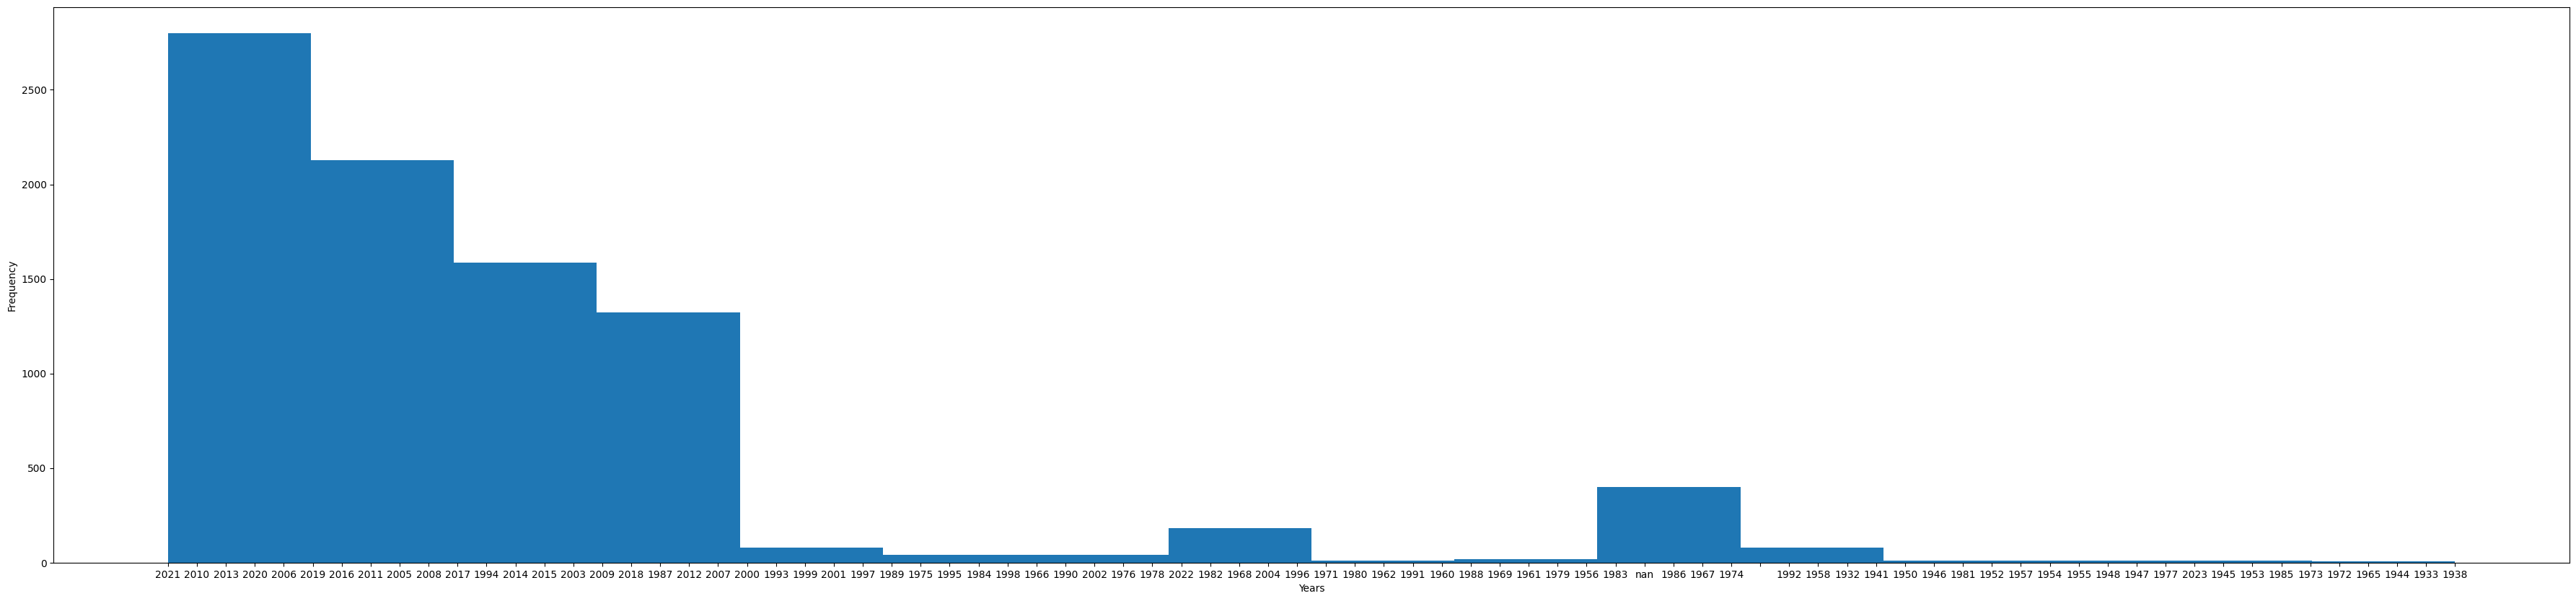

In [41]:
plt.figure(figsize=(45,10))
plt.hist(df['Year_Release'],bins=16)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

Plotting the **Year_Release** column to find if there are outliers. If yes, then fill the missing values with the median else with the mean.

In [42]:
df['Year_Release'] = pd.to_numeric(df['Year_Release'], errors='coerce').astype('Int64')

To fill the missing values as median the dtype should be integer, but here in the above code can't simply change the dtype as there are missing values. That's why we have use above pd.to_numeric() function. This will change the string which have number values and if it won't be able to change the string to interger it will set null at that place.

In [43]:
df['Year_Release'].fillna(df['Year_Release'].median(),inplace=True)

/tmp/ipykernel_33/282800482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year_Release'].fillna(df['Year_Release'].median(),inplace=True)


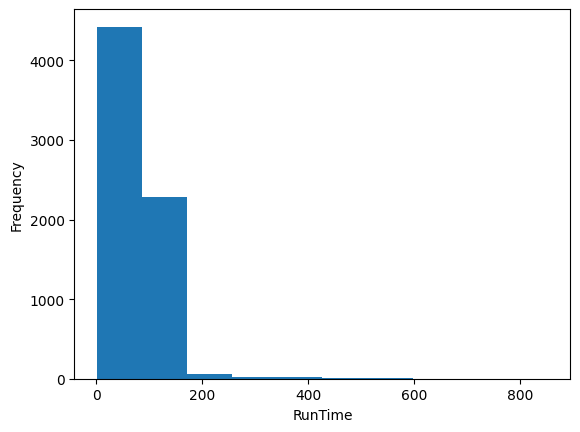

In [44]:
plt.hist(df['RunTime'],bins=10)
plt.xlabel('RunTime')
plt.ylabel('Frequency')
plt.show()

In [45]:
df['RunTime'].fillna(df['RunTime'].median(),inplace=True)

/tmp/ipykernel_33/3665680793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RunTime'].fillna(df['RunTime'].median(),inplace=True)


In [46]:
df.drop(labels='VOTES',axis=1,inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8722 entries, 0 to 9558
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MOVIES        8722 non-null   object 
 1   GENRE         8673 non-null   object 
 2   RATING        7802 non-null   float64
 3   ONE-LINE      8722 non-null   object 
 4   CAST          8722 non-null   object 
 5   RunTime       8722 non-null   float64
 6   Year_Release  8722 non-null   Int64  
dtypes: Int64(1), float64(2), object(4)
memory usage: 553.6+ KB


In [48]:
df['GENRE'].fillna(df['GENRE'].value_counts().index[df['GENRE'].value_counts().argmax()],inplace=True)

/tmp/ipykernel_33/3059535825.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GENRE'].fillna(df['GENRE'].value_counts().index[df['GENRE'].value_counts().argmax()],inplace=True)


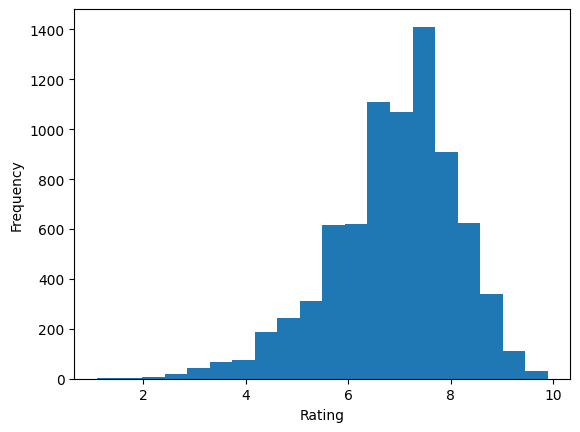

In [49]:
plt.hist(df['RATING'],bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [50]:
df['RATING'].fillna(df['RATING'].median(),inplace=True)

/tmp/ipykernel_33/3346553097.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RATING'].fillna(df['RATING'].median(),inplace=True)


In [51]:
df.isna().sum()

MOVIES          0
GENRE           0
RATING          0
ONE-LINE        0
CAST            0
RunTime         0
Year_Release    0
dtype: int64

Now, there is no missing values.